• Procedure: 5 min pitch on exercise (3-5 slides) +20 min questions

**Hints Programming Exercise:**

• Use functions when ever possible

• Use at least one testing function

• Do a visual analytics of the initial data and the results

• For predicting future values use the lag operator (be aware of selection bias)

• See example for good coding style https://github.com/blue-yonder/presentation_data_science_in_python

**Hints: pitch presentation 5 min**

• Summary of problem (Why) , results (what), how you did it (how)

• Be on time 5 min (practice at home)

**Hints for preparation**

One of the chief pitfalls of data analysis is attempting to solve the wrong problem. Data driven companies have
to extract value out of data. The ultimate goal is data driven decisions in a fully automated system. The problems
to solve for a data scientist is not only the data analytics challenge but the integration into existing legacy system
and the related business constraints.
The questions have a wide scope and covers many different sectors. It is not possible to understand every topic
in depth, however, you have to understand the crosslink and importance of different topics. The information
collateral for the lecture is published at the OWA system:
(additional info might be @ http://de.slideshare.net/frankkienle/information-collateral-datasciencelecture)

**Basic Problem**

You are working as a data scientist for a company which maintaining a larger car fleet
for their logistic services. The company hat a truck fleet (100) with an average milage
per truck and year of 220 000 kms and operates in Gemany. The company would like
to know:
Can we define an added value for the company by knowing more about the gas
prices?
The provided data show an extrac!on of the gasoline prices in Germany. The full
historic of the data can be accessed at: h#ps://crea!vecommons.tankerkoenig.de.
There is as well a description of the data set

**Exercise Goal:**

-Learn a systematic approach to deal with a high level business request

-Learn a data driven approach to ask and answer the correct questions

-Derive a possible business model and judge on what is possible or not


**Procedure:**

-Understand the data

-Define a possible business case

-Develop a model

-Analyze the result

-Present the result


**Task1: understand/analyze the data**

*Questions to be answered (understand the data):*

-How many different locations are present in the data

-How many different brands are there

-What is the min, max price for each gasoline type, per month



Mandatory Homework: Find 5 more questions which might be of interest and present the analytics results (visual plots)



**Task 2: define a possible business potential**

-Describe a possible business potential for the customer

-Do high level calculations of the business case in €



**Task 3: develop a predictive model**

-write a predictor on the gasoline prices (define your horizon carefully)

-start with a trivial predictor, enhance to a (possible) stronger model (scikit-learn)



**Task 4: Analyse the result**

-interpret the results from a mathematical perspective

-interpret the result from a business perspective (think about the realistic assumption that a truck diver will not always follow the best decision)



**Task 5: Present the result**
Imagine you have 3-5 slides to present the result to a management board

-prepare the presenta!on



Deadline: all tasks have to be finished one week before the oral exam 

**source code has to be uploaded to your GITHUB account**


**5 min presenta!ons (3 slides) with the key findings has to be given within the oral. The presenta!on should address (business challenge, key findings)**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1-) Understanding data

In [2]:
cut_prices = pd.read_csv('../input/example_sprit_cut_prices.csv')
cut_station = pd.read_csv('../input/example_sprit_cut_station.csv')

In [3]:
cut_station.columns
cut_station.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


### Normalize Data

In [4]:
cut_station["PLACE"].describe()

count           820
unique          198
top       Karlsruhe
freq             56
Name: PLACE, dtype: object

We should try to normalize to see if data has redundancy. 

In [5]:
cut_station["PLACE"].str.lower().describe()

count           820
unique          166
top       karlsruhe
freq             78
Name: PLACE, dtype: object

In [6]:
cut_station["PLACE"] = cut_station["PLACE"].str.lower()

In [7]:
cut_station["PLACE"].head()

0         karlsruhe
1          mannheim
2    kaiserslautern
3    kaiserslautern
4       germersheim
Name: PLACE, dtype: object

In [8]:
cut_station["ID"].describe()

count                                      824
unique                                     412
top       fe9954a8-3042-46ef-bed8-63d753aeb9e8
freq                                         2
Name: ID, dtype: object

It clearly has. Now all the city names are lower character we can be sure that they are all unique if there is no spelling errors.

In [9]:
cut_station["BRAND"].describe()

count      802
unique      55
top       ARAL
freq       150
Name: BRAND, dtype: object

In [10]:
cut_station["BRAND"].str.lower().describe()

count      802
unique      51
top       aral
freq       150
Name: BRAND, dtype: object

In [11]:
cut_station["BRAND"] = cut_station["BRAND"].str.lower()

In [12]:
cut_station["BRAND"].head()

0    aral
1     jet
2    aral
3     jet
4     jet
Name: BRAND, dtype: object

In [13]:
cut_station["POST_CODE"].describe()

count       820
unique      175
top       67346
freq         22
Name: POST_CODE, dtype: object

In [14]:
cut_station.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,aral,An der Tagweide,2,76139,karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,jet,UNTERMUEHLAUSTRASSE 83,\N,68169,mannheim,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,aral,Trippstadter Straße,69,67663,kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,jet,PARISER STR. 167,\N,67655,kaiserslautern,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,jet,MUENCHENER STRASSE 12,\N,76726,germersheim,\N,49.226800,8.374400


In [15]:
cut_prices.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [16]:
cut_prices.rename(columns = {'STID':'ID'}, inplace = True)

In [17]:
cut_prices.head()

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [18]:
cut_station[cut_station["ID"] == "01bf5a06-4248-43a5-9524-56123fa3ab2f"]

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
239,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,esso,ZELLERTALSTR. 30,,67551,worms,\N,49.633409,8.273847
336,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,esso,ZELLERTALSTR. 30,,67551,worms,\N,49.633409,8.273847


In [19]:
big_table = pd.merge(cut_station, cut_prices , on='ID')

In [20]:
big_table.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,aral,An der Tagweide,2,76139,karlsruhe,\N,49.02028,8.459429,1369,1329,1219,2014-12-14 16:30:01.000000,63
1,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,aral,An der Tagweide,2,76139,karlsruhe,\N,49.02028,8.459429,1409,1369,1269,2014-12-14 20:02:01.000000,21
2,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,aral,An der Tagweide,2,76139,karlsruhe,\N,49.02028,8.459429,1409,1369,1269,2014-12-15 20:02:01.000000,21
3,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,aral,An der Tagweide,2,76139,karlsruhe,\N,49.02028,8.459429,1399,1359,1259,2014-12-16 20:02:01.000000,21
4,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,aral,An der Tagweide,2,76139,karlsruhe,\N,49.02028,8.459429,1379,1339,1239,2014-12-17 05:06:01.000000,21


In [21]:
big_table.drop(columns=['VERSION', 'VERSION_TIME', 'STREET', 'HOUSE_NUMBER', 'PUBLIC_HOLIDAY_IDENTIFIER', 'LAT', 'LNG'], inplace=True)

In [22]:
#Make it euro based
big_table['E5'] = (big_table['E5']/1000)
big_table['E10'] = (big_table['E10']/1000)
big_table['DIESEL'] = (big_table['DIESEL']/1000)

In [23]:
big_table.head()

,ID,NAME,BRAND,POST_CODE,PLACE,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.369,1.329,1.219,2014-12-14 16:30:01.000000,63
1,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.409,1.369,1.269,2014-12-14 20:02:01.000000,21
2,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.409,1.369,1.269,2014-12-15 20:02:01.000000,21
3,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.399,1.359,1.259,2014-12-16 20:02:01.000000,21
4,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.379,1.339,1.239,2014-12-17 05:06:01.000000,21


In [24]:
stats_with_untidy_data = big_table["E5"].describe(), big_table["E10"].describe(), big_table["DIESEL"].describe()
print(stats_with_untidy_data)

(count    4.379052e+06
mean     1.434320e+00
std      2.091502e-01
min     -1.000000e-03
25%      1.379000e+00
50%      1.459000e+00
75%      1.529000e+00
max      9.999000e+00
Name: E5, dtype: float64, count    4.379052e+06
mean     1.404088e+00
std      2.116844e-01
min     -1.000000e-03
25%      1.349000e+00
50%      1.429000e+00
75%      1.499000e+00
max      9.999000e+00
Name: E10, dtype: float64, count    4.379052e+06
mean     1.247491e+00
std      1.037774e-01
min     -1.000000e-03
25%      1.169000e+00
50%      1.239000e+00
75%      1.324000e+00
max      1.129000e+01
Name: DIESEL, dtype: float64)


## Finding Out Bad Data
These are unlikely data. They probably do not represent real data. We can drop them. But it is better to assign None to them because some of the rows might contain real data in other columns.

In [25]:
print("E5 >>>",(big_table["E5"] > 3).sum(), (big_table["E5"] > 7).sum(), (big_table["E5"] > 3).sum())
print("E10 >>>",(big_table["E10"] > 3).sum(), (big_table["E10"] > 7).sum(), (big_table["E10"] > 3).sum())
print("DIESEL >>>",(big_table["DIESEL"] > 3).sum(), (big_table["DIESEL"] > 7).sum(), (big_table["DIESEL"] > 3).sum())

E5 >>> 48 48 48
E10 >>> 32 32 32
DIESEL >>> 40 40 40


In [26]:
print("E5 >>>",(big_table["E5"] < 0.8).sum(), (big_table["E5"] < 1).sum(), (big_table["E5"] < 0).sum())
print("E10 >>>",(big_table["E10"] < 0.8).sum(), (big_table["E10"] < 1).sum(), (big_table["E10"] < 0).sum())
print("DIESEL >>>",(big_table["DIESEL"] < 0.8).sum(), (big_table["DIESEL"] < 1).sum(), (big_table["DIESEL"] < 0).sum())

E5 >>> 69092 69092 2516
E10 >>> 76664 76664 10240
DIESEL >>> 748 844 164


## Get rid of Bad Data

In [27]:
def eliminate_bad_data(x):
    if x < 0.5 or x > 5:
        return None
    else:
        return x

In [28]:
big_table["E5"] = big_table["E5"].apply(eliminate_bad_data)
big_table["E10"] = big_table["E10"].apply(eliminate_bad_data)
big_table["DIESEL"] = big_table["DIESEL"].apply(eliminate_bad_data)

In [29]:
stats_with_tidy_data = big_table["E5"].describe(), big_table["E10"].describe(), big_table["DIESEL"].describe()
print(stats_with_tidy_data)

(count    4.309912e+06
mean     1.457226e+00
std      1.011830e-01
min      1.000000e+00
25%      1.379000e+00
50%      1.459000e+00
75%      1.529000e+00
max      1.999000e+00
Name: E5, dtype: float64, count    4.302356e+06
mean     1.429052e+00
std      9.695346e-02
min      1.000000e+00
25%      1.359000e+00
50%      1.429000e+00
75%      1.499000e+00
max      1.999000e+00
Name: E10, dtype: float64, count    4.378264e+06
mean     1.247630e+00
std      9.950141e-02
min      9.990000e-01
25%      1.169000e+00
50%      1.239000e+00
75%      1.325000e+00
max      1.999000e+00
Name: DIESEL, dtype: float64)


In [32]:
big_table["DATE_CHANGED"].describe()

count                        4379052
unique                        122908
top       2015-08-26 00:42:01.000000
freq                            1640
Name: DATE_CHANGED, dtype: object

In [33]:
#convert date string into datetime64 object
big_table["DATE_CHANGED"] = pd.to_datetime(big_table["DATE_CHANGED"])

In [34]:
big_table["DATE_CHANGED"].describe()

count                 4379052
unique                 122908
top       2015-08-26 00:26:01
freq                     1640
first     2014-06-08 09:50:01
last      2015-09-29 23:34:01
Name: DATE_CHANGED, dtype: object

In [35]:
print("<< Sum of None >>\n", big_table.isnull().sum())
print("<< Sum of All Entities >>\n", big_table.count())
print("<< None as a percentage >>\n", (big_table.isnull().sum()/big_table.count())*100)

<< Sum of None >>
 ID                  0
NAME                0
BRAND           60920
POST_CODE       11684
PLACE           11684
E5              69140
E10             76696
DIESEL            788
DATE_CHANGED        0
CHANGED             0
dtype: int64
<< Sum of All Entities >>
 ID              4379052
NAME            4379052
BRAND           4318132
POST_CODE       4367368
PLACE           4367368
E5              4309912
E10             4302356
DIESEL          4378264
DATE_CHANGED    4379052
CHANGED         4379052
dtype: int64
<< None as a percentage >>
 ID              0.000000
NAME            0.000000
BRAND           1.410795
POST_CODE       0.267530
PLACE           0.267530
E5              1.604209
E10             1.782651
DIESEL          0.017998
DATE_CHANGED    0.000000
CHANGED         0.000000
dtype: float64


We will use this data to model where to buy gas for our trucks so it is better to drop rows that has no place or post_code.

In [36]:
big_table.dropna(subset = ["PLACE"], inplace = True)

In [37]:
print("<< Sum of None >>\n", big_table.isnull().sum())
print("<< Sum of All Entities >>\n", big_table.count())
print("<< None as a percentage >>\n", (big_table.isnull().sum()/big_table.count())*100)

<< Sum of None >>
 ID                  0
NAME                0
BRAND           60920
POST_CODE           0
PLACE               0
E5              69132
E10             76688
DIESEL            780
DATE_CHANGED        0
CHANGED             0
dtype: int64
<< Sum of All Entities >>
 ID              4367368
NAME            4367368
BRAND           4306448
POST_CODE       4367368
PLACE           4367368
E5              4298236
E10             4290680
DIESEL          4366588
DATE_CHANGED    4367368
CHANGED         4367368
dtype: int64
<< None as a percentage >>
 ID              0.000000
NAME            0.000000
BRAND           1.414623
POST_CODE       0.000000
PLACE           0.000000
E5              1.608381
E10             1.787316
DIESEL          0.017863
DATE_CHANGED    0.000000
CHANGED         0.000000
dtype: float64


In [38]:
big_table.head()

,ID,NAME,BRAND,POST_CODE,PLACE,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.369,1.329,1.219,2014-12-14 16:30:01,63
1,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.409,1.369,1.269,2014-12-14 20:02:01,21
2,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.409,1.369,1.269,2014-12-15 20:02:01,21
3,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.399,1.359,1.259,2014-12-16 20:02:01,21
4,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.379,1.339,1.239,2014-12-17 05:06:01,21


In [39]:
time_series_table = big_table.set_index("DATE_CHANGED")

In [40]:
time_series_table.head()

,ID,NAME,BRAND,POST_CODE,PLACE,E5,E10,DIESEL,CHANGED
DATE_CHANGED,,,,,,,,,
2014-12-14 16:30:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.369,1.329,1.219,63
2014-12-14 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.409,1.369,1.269,21
2014-12-15 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.409,1.369,1.269,21
2014-12-16 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.399,1.359,1.259,21
2014-12-17 05:06:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.379,1.339,1.239,21


In [41]:
clear_time_series = time_series_table.dropna()

In [42]:
print("<< Sum of None >>\n", clear_time_series.isnull().sum())

<< Sum of None >>
 ID           0
NAME         0
BRAND        0
POST_CODE    0
PLACE        0
E5           0
E10          0
DIESEL       0
CHANGED      0
dtype: int64


In [43]:
time_series_table.count() - clear_time_series.count()

ID           130028
NAME         130028
BRAND         69108
POST_CODE    130028
PLACE        130028
E5            60896
E10           53340
DIESEL       129248
CHANGED      130028
dtype: int64

In [44]:
clear_time_series.count()

ID           4237340
NAME         4237340
BRAND        4237340
POST_CODE    4237340
PLACE        4237340
E5           4237340
E10          4237340
DIESEL       4237340
CHANGED      4237340
dtype: int64

In [45]:
from nltk.metrics.distance import edit_distance

In [46]:
def find_similar(x, distance = 3):
    """It finds similar words with respect to spelling
    Input: List of words and a distance for edit distance(Default is 3)
    Output: Prints similar words
    """
    i = 0
    j = 1
    for i in range(0, len(x)):
        for j in range(i + 1, len(x)):
            if edit_distance(x[i], x[j]) < distance:
                print("similar ones>", x[i], x[j], "<")       

In [47]:
clear_time_series["PLACE"].unique()

array(['karlsruhe', 'mannheim', 'kaiserslautern', 'germersheim',
       'bad duerkheim', 'alzey', 'mutterstadt', 'iffezheim', 'grünstadt',
       'bellheim', 'annweiler-queichhambach', 'mehr aktiv', 'worms',
       'herxheim', 'karlsruhe-knielingen', 'landau', 'jockgrim',
       'lampertheim-hofheim', 'ludwigshafen', 'oberhausen', 'pirmasens',
       'klingenmünster', 'rodalben', 'saalstadt', 'schifferstadt',
       'rastatt', 'waldsee', 'edenkoben', 'steinweiler',
       'thaleischweiler-fröschen', 'bad dürkheim', 'freckenfeld',
       'speyer', 'bad bergzabern', 'haßloch', 'lampertheim',
       'dannstadt-schauernhe', 'au am rhein', 'eppenbrunn', 'kuppenheim',
       'phillipsburg', 'rheinstetten', 'weilerbach', 'neustadt',
       'queidersbach', 'joehlingen', 'otterberg', 'hochspeyer',
       'carlsberg', 'dettenheim-liedolsheim', 'wattenheim', 'karlsbad',
       'ruelzheim', 'ettlingen ot schöllbronn', 'waldfischbach-burgalben',
       'standenbühl', 'obermoschel', 'malsch', 'baden

In [48]:
(clear_time_series["PLACE"] == "\\n").sum()

816

In [49]:
clear_time_series[clear_time_series["PLACE"] == "\\n"]

,ID,NAME,BRAND,POST_CODE,PLACE,E5,E10,DIESEL,CHANGED
DATE_CHANGED,,,,,,,,,
2015-07-10 18:10:01,de1e26ff-6fb8-436e-b819-877ab581527a,SBK - Tankstelle,\n,\N,\n,1.469,1.449,1.159,20
2015-07-11 18:46:01,de1e26ff-6fb8-436e-b819-877ab581527a,SBK - Tankstelle,\n,\N,\n,1.479,1.459,1.179,1
2015-07-14 15:58:01,de1e26ff-6fb8-436e-b819-877ab581527a,SBK - Tankstelle,\n,\N,\n,1.479,1.459,1.169,1
2015-07-15 15:02:01,de1e26ff-6fb8-436e-b819-877ab581527a,SBK - Tankstelle,\n,\N,\n,1.459,1.439,1.149,21
2015-07-17 08:26:01,de1e26ff-6fb8-436e-b819-877ab581527a,SBK - Tankstelle,\n,\N,\n,1.459,1.439,1.179,21
2015-07-17 11:26:01,de1e26ff-6fb8-436e-b819-877ab581527a,SBK - Tankstelle,\n,\N,\n,1.459,1.439,1.159,1
2015-07-20 08:26:01,de1e26ff-6fb8-436e-b819-877ab581527a,SBK - Tankstelle,\n,\N,\n,1.459,1.439,1.159,21
2015-07-21 08:22:01,de1e26ff-6fb8-436e-b819-877ab581527a,SBK - Tankstelle,\n,\N,\n,1.469,1.449,1.189,21
2015-07-22 16:34:01,de1e26ff-6fb8-436e-b819-877ab581527a,SBK - Tankstelle,\n,\N,\n,1.429,1.409,1.179,20


In [50]:
clear_time_series = clear_time_series[clear_time_series["PLACE"] != "\\n"]

In [51]:
clear_time_series[clear_time_series["PLACE"] == "\\n"]

,ID,NAME,BRAND,POST_CODE,PLACE,E5,E10,DIESEL,CHANGED
DATE_CHANGED,,,,,,,,,


In [52]:
find_similar(clear_time_series["PLACE"].unique())

similar ones> karlsruhe karlsrue <
similar ones> karlsruhe karlsruhe  <
similar ones> mannheim monsheim <
similar ones> mannheim marnheim <
similar ones> germersheim durmersheim <
similar ones> bad duerkheim bad dürkheim <
similar ones> grünstadt gruenstadt <
similar ones> herxheim hessheim <
similar ones> haßloch hassloch <
similar ones> phillipsburg philippsburg <
similar ones> wattenheim wachenheim <
similar ones> ruelzheim rülzheim <
similar ones> deidesheim edesheim <
similar ones> karlsrue karlsruhe  <
similar ones> gimbsheim lambsheim <
similar ones> annweiler winnweiler <


In [53]:
place_correction = {'karlsrue': 'karlsruhe', 'karlsruhe ': 'karlsruhe','bad duerkheim': 'bad dürkheim', 'gruenstadt': 'grünstadt', 
                   'haßloch': 'hassloch', 'phillipsburg': 'philippsburg', 'ruelzheim': 'rülzheim'}

In [54]:
clear_time_series.replace({"PLACE": place_correction}, inplace = True)

In [55]:
find_similar(clear_time_series["PLACE"].unique())

similar ones> mannheim monsheim <
similar ones> mannheim marnheim <
similar ones> germersheim durmersheim <
similar ones> herxheim hessheim <
similar ones> wattenheim wachenheim <
similar ones> deidesheim edesheim <
similar ones> gimbsheim lambsheim <
similar ones> annweiler winnweiler <


In [56]:
find_similar(clear_time_series["BRAND"].unique(), distance = 2)

similar ones> freie frei <
similar ones> supermarkt-tankstelle supermarkt tankstelle <


In [57]:
clear_time_series["BRAND"].unique()

array(['aral', 'jet', 'supermarkt-tankstelle am real- markt',
       'tankhof iffezheim', 'schiffer & nicklaus gmbh',
       'sefrin heizöl & kraftstoffe', 'bft', 'markant', 'avia',
       'nicht mehr aktiv', 'freie tankstelle', 'hem', 'fritz walter gmbh',
       'tamoil', 'freie', 'rnt', '\\n', 'schuster & sohn kg', 'e center',
       'eberhardt jöhlingen', 'agip', 'winkler',
       'mr. wash autoservice ag', 'esso', 'zg raiffeisen energie',
       'supermarkt-tankstelle', 'classic', 'shell',
       'supermarkt tankstelle', 'raiffeisen tankstelle', 'preis', 'mtb',
       'tankcenter', 'ts arnt', 'frei', 'omv', 'frühmesser gmbh', 'oil!',
       'sb markt', 'sb', 'total', 'ed', 'sb-markttankstelle',
       'markenfreie ts', 'top', 't', 'elan', 'tankstelle heinz'],
      dtype=object)

In [58]:
clear_time_series = clear_time_series[clear_time_series["BRAND"] != "\\n"]

In [59]:
clear_time_series["BRAND"].unique()

array(['aral', 'jet', 'supermarkt-tankstelle am real- markt',
       'tankhof iffezheim', 'schiffer & nicklaus gmbh',
       'sefrin heizöl & kraftstoffe', 'bft', 'markant', 'avia',
       'nicht mehr aktiv', 'freie tankstelle', 'hem', 'fritz walter gmbh',
       'tamoil', 'freie', 'rnt', 'schuster & sohn kg', 'e center',
       'eberhardt jöhlingen', 'agip', 'winkler',
       'mr. wash autoservice ag', 'esso', 'zg raiffeisen energie',
       'supermarkt-tankstelle', 'classic', 'shell',
       'supermarkt tankstelle', 'raiffeisen tankstelle', 'preis', 'mtb',
       'tankcenter', 'ts arnt', 'frei', 'omv', 'frühmesser gmbh', 'oil!',
       'sb markt', 'sb', 'total', 'ed', 'sb-markttankstelle',
       'markenfreie ts', 'top', 't', 'elan', 'tankstelle heinz'],
      dtype=object)

In [60]:
brand_correction = {"supermarkt tankstelle": "supermarkt-tankstelle"}

In [61]:
clear_time_series.replace({"BRAND": brand_correction}, inplace = True)

In [62]:
find_similar(clear_time_series["BRAND"].unique(), distance = 2)

similar ones> freie frei <


# Questions
Questions to be answered (understand the data):

**1.How many different locations are present in the data**

**2.How many different brands are there**

**3.What is the min, max price for each gasoline type, per month**

Mandatory Homework: Find 5 more questions which might be of interest and
present the analytics results (visual plots)

**4.What is the mean price for each gasoline type, each month?**

**5.Which brands do have the most expensive price and cheapest price with respect to mean?**

**6.Which places do have the most expensice price and cheapest price with respect to mean?**

**7.Do gasoline types correlate with each other?**

**8.What are the price differences between gasoline types monthly with respect to mean?**

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [64]:
#1 and #2
print("1-) unique locations >> ", len(clear_time_series["PLACE"].unique()))
print("2-) unique brands >> ", len(clear_time_series["BRAND"].unique()))

1-) unique locations >>  152
2-) unique brands >>  46


In [65]:
monthly_mean = clear_time_series[["E5", "E10", "DIESEL"]].resample("M").mean()
monthly_max = clear_time_series[["E5", "E10", "DIESEL"]].resample("M").max()
monthly_min = clear_time_series[["E5", "E10", "DIESEL"]].resample("M").min()

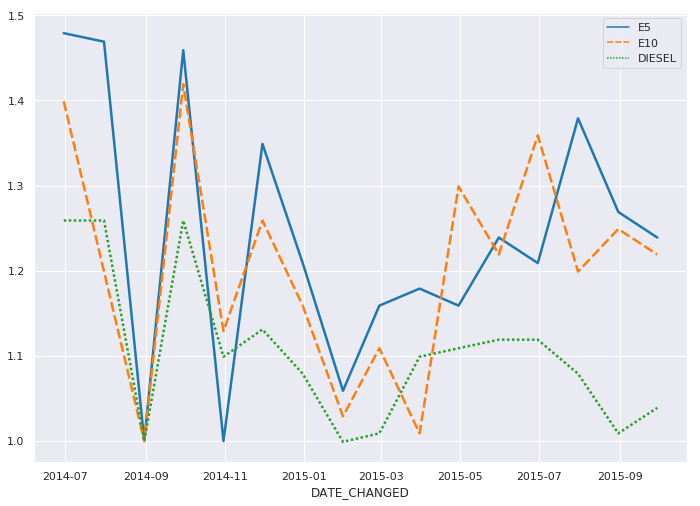

In [66]:
#3-)
sns.lineplot(data=monthly_min, palette="tab10", linewidth=2.5)

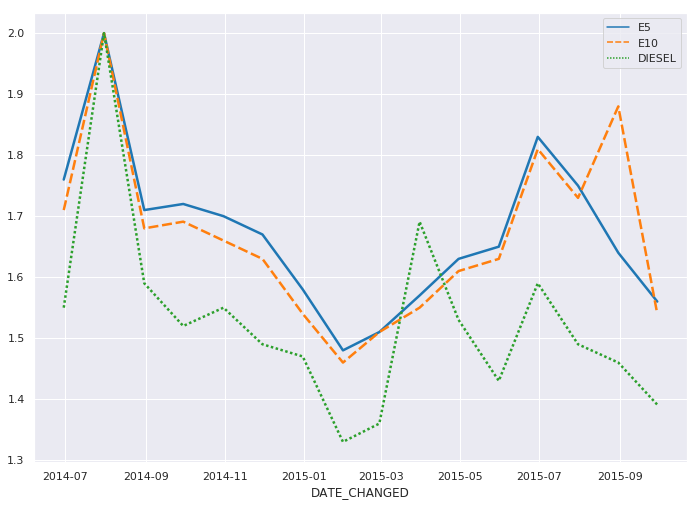

In [67]:
sns.lineplot(data=monthly_max, palette="tab10", linewidth=2.5)

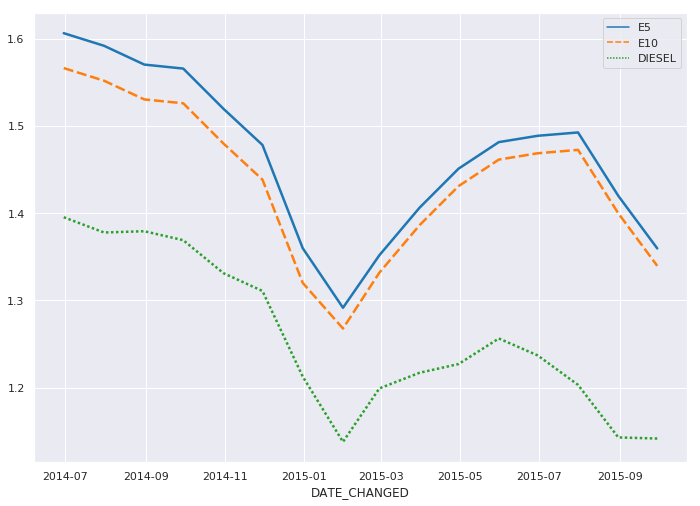

In [68]:
#4-)
sns.lineplot(data=monthly_mean, palette="tab10", linewidth=2.5)

In [69]:
brand_wise_mean = clear_time_series.groupby("BRAND")[["E5", "E10", "DIESEL"]].resample("M").mean()

In [70]:
brand_wise_mean.head()

E5       E10    DIESEL
BRAND DATE_CHANGED                              
agip  2014-06-30    1.597403  1.557403  1.384001
      2014-07-31    1.583443  1.543470  1.366580
      2014-08-31    1.557627  1.517640  1.363827
      2014-09-30    1.551487  1.511487  1.353112
      2014-10-31    1.502190  1.462194  1.317302

In [71]:
brand_wise_mean.groupby("DATE_CHANGED").head()

E5       E10    DIESEL
BRAND   DATE_CHANGED                              
agip    2014-06-30    1.597403  1.557403  1.384001
        2014-07-31    1.583443  1.543470  1.366580
        2014-08-31    1.557627  1.517640  1.363827
        2014-09-30    1.551487  1.511487  1.353112
        2014-10-31    1.502190  1.462194  1.317302
        2014-11-30    1.467545  1.427555  1.298316
        2014-12-31    1.350716  1.310716  1.200069
        2015-01-31    1.291342  1.270575  1.133517
        2015-02-28    1.340450  1.320450  1.184783
        2015-03-31    1.394821  1.374826  1.205569
        2015-04-30    1.438256  1.418243  1.216938
        2015-05-31    1.468907  1.448903  1.243615
        2015-06-30    1.471641  1.451641  1.218917
        2015-07-31    1.479997  1.460026  1.189578
        2015-08-31    1.416832  1.397079  1.139859
        2015-09-30    1.349821  1.329821  1.132870
aral    2014-06-30    1.617533  1.577533  1.406475
        2014-07-31    1.607035  1.567036  1.393881
        2014-08-31    1.583249  1.543266  1.393845
        2014-09-30    1.571744  1.531754  1.376316
        2014-10-31    1.529419  1.489419  1.340588
        2014-11-30    1.484135  1.444136  1.318678
        2014-12-31    1.363738  1.323937  1.215685
        2015-01-31    1.297345  1.277359  1.142779
        2015-02-28    1.361160  1.341171  1.209004
        2015-03-31    1.413633  1.393611  1.222876
        2015-04-30    1.458482  1.438486  1.231846
        2015-05-31    1.489205  1.469219  1.262535
        2015-06-30    1.498570  1.478576  1.244067
        2015-07-31    1.503447  1.483448  1.212162
...                        ...       ...       ...
bft     2014-08-31    1.546227  1.506281  1.354973
        2014-09-30    1.538927  1.498956  1.341709
        2014-10-31    1.490729  1.450631  1.304702
        2014-11-30    1.460477  1.420501  1.293096
        2014-12-31    1.348940  1.309015  1.200167
        2015-01-31    1.279108  1.254439  1.124806
        2015-02-28    1.336407  1.316351  1.181491
        2015-03-31    1.392799  1.372209  1.202141
        2015-04-30    1.438396  1.417888  1.214974
        2015-05-31    1.472477  1.451277  1.246605
        2015-06-30    1.470281  1.449957  1.218956
        2015-07-31    1.474271  1.454260  1.186146
        2015-08-31    1.406547  1.386340  1.127697
        2015-09-30    1.340540  1.320734  1.122184
classic 2014-06-30    1.579435  1.539609  1.360478
        2014-07-31    1.561613  1.521161  1.343724
        2014-08-31    1.535047  1.495105  1.340570
        2014-09-30    1.532846  1.492846  1.331781
        2014-10-31    1.483485  1.443485  1.298576
        2014-11-30    1.445429  1.405429  1.276338
        2014-12-31    1.335753  1.295623  1.180688
        2015-01-31    1.270395  1.246442  1.109581
        2015-02-28    1.334034  1.314034  1.175779
        2015-03-31    1.391198  1.371198  1.197571
        2015-04-30    1.435644  1.415644  1.205986
        2015-05-31    1.460528  1.440528  1.228931
        2015-06-30    1.460776  1.440776  1.203868
        2015-07-31    1.460299  1.440429  1.165797
        2015-08-31    1.395693  1.375693  1.113764
        2015-09-30    1.341500  1.321500  1.122396

[80 rows x 3 columns]

In [72]:
#5-)
most_exp_brand_per_month_e5 = brand_wise_mean.loc[brand_wise_mean.groupby("DATE_CHANGED")["E5"].idxmax()]["E5"]
most_exp_brand_per_month_e10 = brand_wise_mean.loc[brand_wise_mean.groupby("DATE_CHANGED")["E10"].idxmax()]["E10"]
most_exp_brand_per_month_diesel = brand_wise_mean.loc[brand_wise_mean.groupby("DATE_CHANGED")["DIESEL"].idxmax()]["DIESEL"]
print("<< most expensive brands per month e5 type >>\n", most_exp_brand_per_month_e5)
print("<< most expensive brands per month e10 type >>\n", most_exp_brand_per_month_e10)
print("<< most expensive brands per month diesel type >>\n", most_exp_brand_per_month_diesel)

<< most expensive brands per month e5 type >>
 BRAND                DATE_CHANGED
shell                2014-06-30      1.627298
                     2014-07-31      1.607939
mtb                  2014-08-31      1.591411
eberhardt jöhlingen  2014-09-30      1.588545
shell                2014-10-31      1.539938
nicht mehr aktiv     2014-11-30      1.569000
                     2014-12-31      1.569000
eberhardt jöhlingen  2015-01-31      1.306917
esso                 2015-02-28      1.362849
                     2015-03-31      1.419499
shell                2015-04-30      1.466935
eberhardt jöhlingen  2015-05-31      1.520207
                     2015-06-30      1.515667
                     2015-07-31      1.524469
                     2015-08-31      1.453521
                     2015-09-30      1.398206
Name: E5, dtype: float64
<< most expensive brands per month e10 type >>
 BRAND                DATE_CHANGED
shell                2014-06-30      1.587317
                     2014-07-3

In [73]:
cheapest_brand_per_month_e5 = brand_wise_mean.loc[brand_wise_mean.groupby("DATE_CHANGED")["E5"].idxmin()]["E5"]
cheapest_brand_per_month_e10 = brand_wise_mean.loc[brand_wise_mean.groupby("DATE_CHANGED")["E10"].idxmin()]["E10"]
cheapest_brand_per_month_diesel = brand_wise_mean.loc[brand_wise_mean.groupby("DATE_CHANGED")["DIESEL"].idxmin()]["DIESEL"]
print("<< cheapest brands per month e5 type >>\n", cheapest_brand_per_month_e5)
print("<< cheapest brands per month e10 type >>\n", cheapest_brand_per_month_e10)
print("<< cheapest brands per month diesel type >>\n", cheapest_brand_per_month_diesel)

<< cheapest brands per month e5 type >>
 BRAND                    DATE_CHANGED
winkler                  2014-06-30      1.499000
mr. wash autoservice ag  2014-07-31      1.524577
                         2014-08-31      1.492295
winkler                  2014-09-30      1.489000
mr. wash autoservice ag  2014-10-31      1.449769
                         2014-11-30      1.395100
                         2014-12-31      1.292684
                         2015-01-31      1.232417
                         2015-02-28      1.283762
                         2015-03-31      1.335983
                         2015-04-30      1.379370
                         2015-05-31      1.412611
winkler                  2015-06-30      1.424000
                         2015-07-31      1.421500
                         2015-08-31      1.353000
                         2015-09-30      1.302333
Name: E5, dtype: float64
<< cheapest brands per month e10 type >>
 BRAND                    DATE_CHANGED
winkler         

In [74]:
#6-)
place_wise_mean = clear_time_series.groupby("PLACE")[["E5", "E10", "DIESEL"]].resample("M").mean()

In [75]:
most_exp_place_per_month_e5 = place_wise_mean.loc[place_wise_mean.groupby("DATE_CHANGED")["E5"].idxmax()]["E5"]
most_exp_place_per_month_e10 = place_wise_mean.loc[place_wise_mean.groupby("DATE_CHANGED")["E10"].idxmax()]["E10"]
most_exp_place_per_month_diesel = place_wise_mean.loc[place_wise_mean.groupby("DATE_CHANGED")["DIESEL"].idxmax()]["DIESEL"]
print("<< most expensive places per month e5 type >>\n", most_exp_place_per_month_e5)
print("<< most expensive places per month e10 type >>\n", most_exp_place_per_month_e10)
print("<< most expensive places per month diesel type >>\n", most_exp_place_per_month_diesel)

<< most expensive places per month e5 type >>
 PLACE             DATE_CHANGED
mahlberg / baden  2014-06-30      1.688767
                  2014-07-31      1.683098
wattenheim        2014-08-31      1.699000
                  2014-09-30      1.669000
                  2014-10-31      1.629000
                  2014-11-30      1.569000
mehr aktiv        2014-12-31      1.569000
wattenheim        2015-01-31      1.405000
                  2015-02-28      1.437750
                  2015-03-31      1.505667
                  2015-04-30      1.559000
mahlberg / baden  2015-05-31      1.599000
                  2015-06-30      1.673615
                  2015-07-31      1.596685
                  2015-08-31      1.544301
wattenheim        2015-09-30      1.499000
Name: E5, dtype: float64
<< most expensive places per month e10 type >>
 PLACE             DATE_CHANGED
mahlberg / baden  2014-06-30      1.648767
                  2014-07-31      1.643098
wattenheim        2014-08-31      1.659000
 

In [76]:
cheapest_place_per_month_e5 = place_wise_mean.loc[place_wise_mean.groupby("DATE_CHANGED")["E5"].idxmin()]["E5"]
cheapest_place_per_month_e10 = place_wise_mean.loc[place_wise_mean.groupby("DATE_CHANGED")["E10"].idxmin()]["E10"]
cheapest_place_per_month_diesel = place_wise_mean.loc[place_wise_mean.groupby("DATE_CHANGED")["DIESEL"].idxmin()]["DIESEL"]
print("<< cheapest places per month e5 type >>\n", cheapest_place_per_month_e5)
print("<< cheapest places per month e10 type >>\n", cheapest_place_per_month_e10)
print("<< cheapest places per month diesel type >>\n", cheapest_place_per_month_diesel)

<< cheapest places per month e5 type >>
 PLACE                    DATE_CHANGED
mehr aktiv               2014-06-30      1.544000
steinweiler              2014-07-31      1.544212
eich                     2014-08-31      1.514000
                         2014-09-30      1.522333
                         2014-10-31      1.464000
                         2014-11-30      1.422077
ludwigshafen oggersheim  2014-12-31      1.311304
steinweiler              2015-01-31      1.247659
eich                     2015-02-28      1.296500
katzenbach               2015-03-31      1.355000
vinningen                2015-04-30      1.410957
eich                     2015-05-31      1.426143
                         2015-06-30      1.431000
gundersheim              2015-07-31      1.446683
katzenbach               2015-08-31      1.375455
gundersheim              2015-09-30      1.316329
Name: E5, dtype: float64
<< cheapest places per month e10 type >>
 PLACE                    DATE_CHANGED
eich            

In [77]:
monthly_mean.head()

,E5,E10,DIESEL
DATE_CHANGED,,,
2014-06-30,1.606239,1.566225,1.395299
2014-07-31,1.591790,1.551775,1.377809
2014-08-31,1.570254,1.530315,1.379260
2014-09-30,1.565670,1.525906,1.369000
2014-10-31,1.519548,1.479753,1.331174


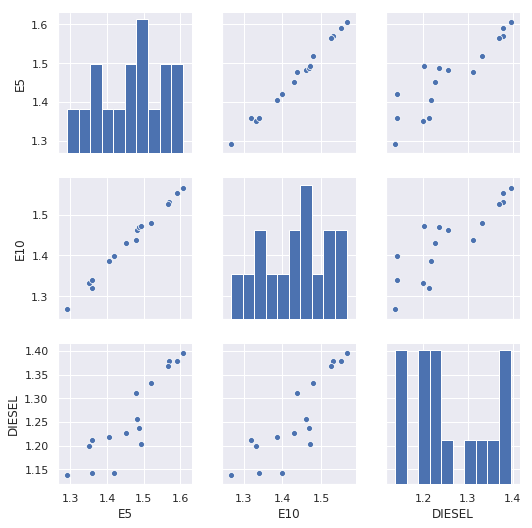

In [78]:
sns.pairplot(monthly_mean)

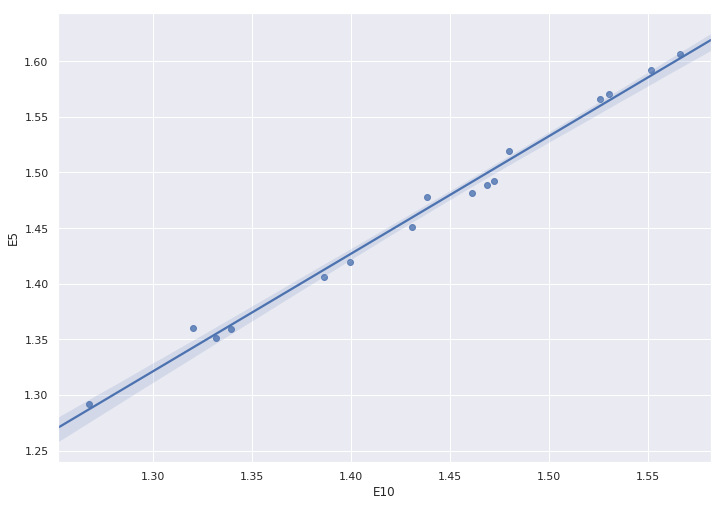

In [79]:
sns.regplot(x="E10", y="E5", data=monthly_mean);

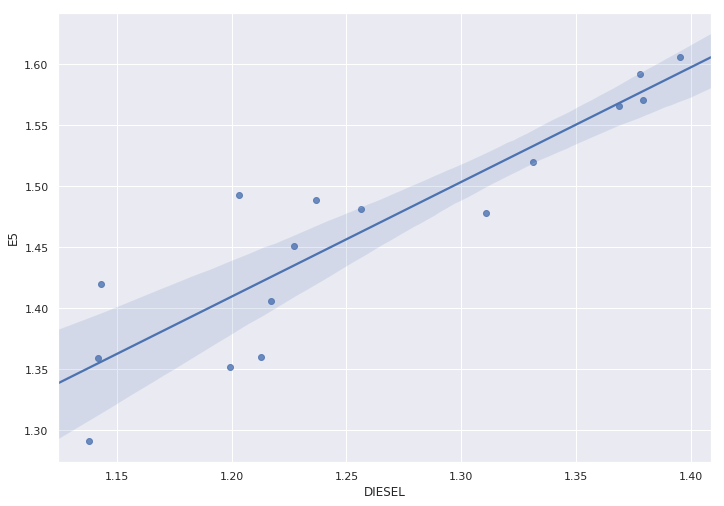

In [80]:
sns.regplot(x="DIESEL", y="E5", data=monthly_mean);

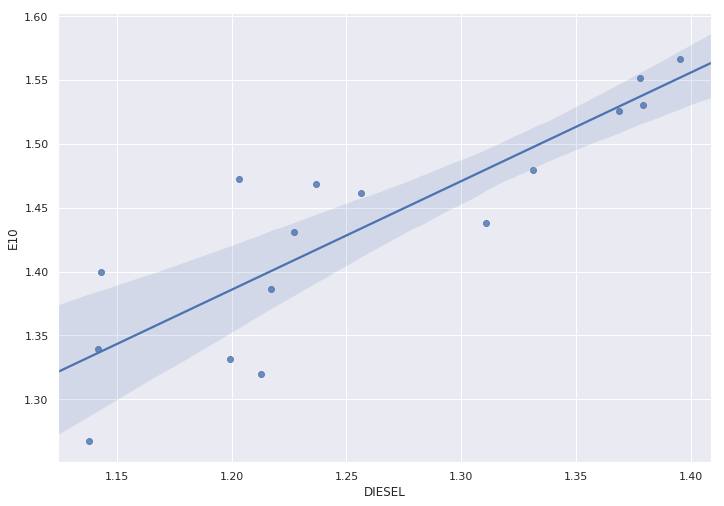

In [81]:
sns.regplot(x="DIESEL", y="E10", data=monthly_mean);

As we see e5 and e10 correlate with each other greatly. Diesel also correlates with other gasoline types but it has lesser degree of correlation.

In [257]:
#8-) 
print("monthly mean differences between e5 and e10\n", monthly_mean["E5"] - monthly_mean["E10"])
print("monthly mean differences between e5 and diesel\n", monthly_mean["E5"] - monthly_mean["DIESEL"])
print("monthly mean differences between e10 and diesel\n", monthly_mean["E10"] - monthly_mean["DIESEL"])


monthly mean differences between e5 and e10
 DATE_CHANGED
2014-06-30    0.040015
2014-07-31    0.040016
2014-08-31    0.039939
2014-09-30    0.039764
2014-10-31    0.039795
2014-11-30    0.039767
2014-12-31    0.039755
2015-01-31    0.023775
2015-02-28    0.019986
2015-03-31    0.020044
2015-04-30    0.020024
2015-05-31    0.020023
2015-06-30    0.020035
2015-07-31    0.019983
2015-08-31    0.020014
2015-09-30    0.019978
Freq: M, dtype: float64
monthly mean differences between e5 and diesel
 DATE_CHANGED
2014-06-30    0.210940
2014-07-31    0.213981
2014-08-31    0.190994
2014-09-30    0.196669
2014-10-31    0.188373
2014-11-30    0.167375
2014-12-31    0.147113
2015-01-31    0.153695
2015-02-28    0.152577
2015-03-31    0.189222
2015-04-30    0.223927
2015-05-31    0.225032
2015-06-30    0.251773
2015-07-31    0.289329
2015-08-31    0.276891
2015-09-30    0.217862
Freq: M, dtype: float64
monthly mean differences between e10 and diesel
 DATE_CHANGED
2014-06-30    0.170925
2014-07-31  

# Task 2 - Defining a Business Model

* Describe a possible business potential for the customer

We have 100 truck and each of them makes average 220 000 km in a year.
We can use cheapest oil prices based on brand and place. If we advise truck drivers to select their oil based on these criteria, we can make profit based on expected value.

* Do high level calculations of the business case in €

I have found data about gasoline consumption in Germany from DIW Economic Bulletin 2015-36. Table 3 gives general information about fuel consumption.

* Average diesel consumption/100 km for lorries is 18.6 liter in 2013.
* Average gasoline consumption/100 km for lorries is 11.5 liter in 2013. 

Our assumptions will be based on these data.

https://www.diw.de/documents/publikationen/73/diw_01.c.513315.de/diw_econ_bull_2015-36.pdf


In [82]:
print("<<profit from selecting cheapest brand diesel>>\n", monthly_mean["DIESEL"] - cheapest_brand_per_month_diesel)
print("<<profit from selecting cheapest brand e5>>\n", monthly_mean["E5"] - cheapest_brand_per_month_e5)
print("<<profit from selecting cheapest brand e10>>\n", monthly_mean["E10"] - cheapest_brand_per_month_e10)

<<profit from selecting cheapest brand diesel>>
 BRAND                    DATE_CHANGED
winkler                  2014-06-30      0.086299
mr. wash autoservice ag  2014-07-31      0.069963
                         2014-08-31      0.079351
                         2014-09-30      0.074896
                         2014-10-31      0.065764
                         2014-11-30      0.074478
                         2014-12-31      0.069870
                         2015-01-31      0.064674
                         2015-02-28      0.068963
                         2015-03-31      0.064161
                         2015-04-30      0.068686
rnt                      2015-05-31      0.077351
mr. wash autoservice ag  2015-06-30      0.069431
                         2015-07-31      0.066172
winkler                  2015-08-31      0.064931
                         2015-09-30      0.059339
Name: DIESEL, dtype: float64
<<profit from selecting cheapest brand e5>>
 BRAND                    DATE_CHANGED
w

In [83]:
print("<<profit from selecting cheapest place diesel>>\n", monthly_mean["DIESEL"] - cheapest_place_per_month_diesel)
print("<<profit from selecting cheapest place e5>>\n", monthly_mean["E5"] - cheapest_place_per_month_e5)
print("<<profit from selecting cheapest place e10>>\n", monthly_mean["E10"] - cheapest_place_per_month_e10)

<<profit from selecting cheapest place diesel>>
 PLACE                    DATE_CHANGED
eich                     2014-06-30      0.062966
                         2014-07-31      0.057143
                         2014-08-31      0.063594
                         2014-09-30      0.053334
                         2014-10-31      0.054674
                         2014-11-30      0.054855
ludwigshafen oggersheim  2014-12-31      0.049207
                         2015-01-31      0.047242
eich                     2015-02-28      0.060106
                         2015-03-31      0.048041
gundersheim              2015-04-30      0.039921
eich                     2015-05-31      0.055923
                         2015-06-30      0.051866
                         2015-07-31      0.050292
katzenbach               2015-08-31      0.049294
gundersheim              2015-09-30      0.043288
Name: DIESEL, dtype: float64
<<profit from selecting cheapest place e5>>
 PLACE                    DATE_CHANGED
m

In [84]:
# Average diesel consumption/100 km for lorries is 18.6 liter in 2013.
avg_die_100 = 18.6
#Average gasoline consumption/100 km for lorries is 11.5 liter in 2013
avg_gas_100 = 11.5

truck_fleet = 100
total_km_per_truck = 220000

total_diesel_need_per_truck_yearly = (total_km_per_truck / 100) * avg_die_100
total_gas_need_per_truck_yearly = (total_km_per_truck / 100) * avg_gas_100
print("total diesel needed per truck yearly is", total_diesel_need_per_truck_yearly)
print("total gas needed per truck yearly is", total_gas_need_per_truck_yearly)

total_diesel_need_per_truck_monthly = total_diesel_need_per_truck_yearly / 12
total_gas_need_per_truck_monthly = total_gas_need_per_truck_yearly / 12
print("total diesel needed per truck monthly is", total_diesel_need_per_truck_monthly)
print("total gas needed per truck monthly is", total_gas_need_per_truck_monthly)

total diesel needed per truck yearly is 40920.0
total gas needed per truck yearly is 25300.0
total diesel needed per truck monthly is 3410.0
total gas needed per truck monthly is 2108.3333333333335


In [85]:
one_year_monthly_mean = monthly_mean[:12]
one_year_monthly_mean["E5_COST"] = one_year_monthly_mean["E5"]*total_gas_need_per_truck_monthly
one_year_monthly_mean["E10_COST"] = one_year_monthly_mean["E10"]*total_gas_need_per_truck_monthly
one_year_monthly_mean["DIESEL_COST"] = one_year_monthly_mean["DIESEL"]*total_diesel_need_per_truck_monthly
one_year_monthly_mean

,E5,E10,DIESEL,E5_COST,E10_COST,DIESEL_COST
DATE_CHANGED,,,,,,
2014-06-30,1.606239,1.566225,1.395299,3386.487759,3302.123522,4757.970766
2014-07-31,1.591790,1.551775,1.377809,3356.024718,3271.658600,4698.330374
2014-08-31,1.570254,1.530315,1.379260,3310.619176,3226.413618,4703.278209
2014-09-30,1.565670,1.525906,1.369000,3300.953554,3217.118553,4668.290692
2014-10-31,1.519548,1.479753,1.331174,3203.713306,3119.812122,4539.304949
2014-11-30,1.478152,1.438385,1.310778,3116.437556,3032.595197,4469.751562
2014-12-31,1.359842,1.320087,1.212729,2867.001128,2783.184217,4135.406506
2015-01-31,1.291536,1.267761,1.137841,2722.988404,2672.862351,3880.037284
2015-02-28,1.351683,1.331698,1.199106,2849.799067,2807.662951,4088.952469


In [86]:
one_year_monthly_mean[["E5_COST", "E10_COST", "DIESEL_COST"]].sum()

E5_COST        37261.261774
E10_COST       36453.977583
DIESEL_COST    52559.788860
dtype: float64

If we follow no rules and select gasoline types, these are our cost per truck. But if we choose oil prices based on brand or place, does cost change? We need to find out.

In [87]:
cheapest_brand_per_month_e5[:12].values

array([1.499     , 1.52457692, 1.49229545, 1.489     , 1.44976923,
       1.3951    , 1.29268421, 1.23241667, 1.2837619 , 1.33598276,
       1.37937037, 1.41261111])

In [88]:
one_year_monthly_mean_cheapest_brand = one_year_monthly_mean.copy()
one_year_monthly_mean_cheapest_brand["E5"] = cheapest_brand_per_month_e5[:12].values
one_year_monthly_mean_cheapest_brand["E10"] = cheapest_brand_per_month_e10[:12].values
one_year_monthly_mean_cheapest_brand["DIESEL"] = cheapest_brand_per_month_diesel[:12].values
one_year_monthly_mean_cheapest_brand["E5_COST"] = one_year_monthly_mean_cheapest_brand["E5"]*total_gas_need_per_truck_monthly
one_year_monthly_mean_cheapest_brand["E10_COST"] = one_year_monthly_mean_cheapest_brand["E10"]*total_gas_need_per_truck_monthly
one_year_monthly_mean_cheapest_brand["DIESEL_COST"] = one_year_monthly_mean_cheapest_brand["DIESEL"]*total_diesel_need_per_truck_monthly
one_year_monthly_mean_cheapest_brand

,E5,E10,DIESEL,E5_COST,E10_COST,DIESEL_COST
DATE_CHANGED,,,,,,
2014-06-30,1.499000,1.459000,1.309000,3160.391667,3076.058333,4463.690000
2014-07-31,1.524577,1.484481,1.307846,3214.316346,3129.780288,4459.755385
2014-08-31,1.492295,1.452295,1.299909,3146.256250,3061.922917,4432.690000
2014-09-30,1.489000,1.439000,1.294104,3139.308333,3033.891667,4412.895208
2014-10-31,1.449769,1.410282,1.265410,3056.596795,2973.344658,4315.048974
2014-11-30,1.395100,1.355000,1.236300,2941.335833,2856.791667,4215.783000
2014-12-31,1.292684,1.251719,1.142860,2725.409211,2639.041520,3897.151404
2015-01-31,1.232417,1.208333,1.073167,2598.345139,2547.569444,3659.498333
2015-02-28,1.283762,1.264048,1.130143,2706.598016,2665.033730,3853.787143


In [89]:
one_year_monthly_mean_cheapest_brand[["E5_COST", "E10_COST", "DIESEL_COST"]].sum()

E5_COST        35391.682196
E10_COST       34559.836689
DIESEL_COST    49611.987710
dtype: float64

In [90]:
one_year_monthly_mean[["E5_COST", "E10_COST", "DIESEL_COST"]].sum() - one_year_monthly_mean_cheapest_brand[["E5_COST", "E10_COST", "DIESEL_COST"]].sum()

E5_COST        1869.579579
E10_COST       1894.140894
DIESEL_COST    2947.801150
dtype: float64

In [91]:
print("Selecting cheapest brands gives this amount of savings for our truck fleet with respect to gasoline types in a year")
(one_year_monthly_mean[["E5_COST", "E10_COST", "DIESEL_COST"]].sum() - one_year_monthly_mean_cheapest_brand[["E5_COST", "E10_COST", "DIESEL_COST"]].sum())*100

Selecting cheapest brands gives this amount of savings for our truck fleet with respect to gasoline types in a year


E5_COST        186957.957863
E10_COST       189414.089413
DIESEL_COST    294780.114967
dtype: float64

In [92]:
one_year_monthly_mean_cheapest_place = one_year_monthly_mean.copy()
one_year_monthly_mean_cheapest_place["E5"] = cheapest_place_per_month_e5[:12].values
one_year_monthly_mean_cheapest_place["E10"] = cheapest_place_per_month_e10[:12].values
one_year_monthly_mean_cheapest_place["DIESEL"] = cheapest_place_per_month_diesel[:12].values
one_year_monthly_mean_cheapest_place["E5_COST"] = one_year_monthly_mean_cheapest_place["E5"]*total_gas_need_per_truck_monthly
one_year_monthly_mean_cheapest_place["E10_COST"] = one_year_monthly_mean_cheapest_place["E10"]*total_gas_need_per_truck_monthly
one_year_monthly_mean_cheapest_place["DIESEL_COST"] = one_year_monthly_mean_cheapest_place["DIESEL"]*total_diesel_need_per_truck_monthly
one_year_monthly_mean_cheapest_place

,E5,E10,DIESEL,E5_COST,E10_COST,DIESEL_COST
DATE_CHANGED,,,,,,
2014-06-30,1.544000,1.504000,1.332333,3255.266667,3170.933333,4543.256667
2014-07-31,1.544212,1.504333,1.320667,3255.713889,3171.636111,4503.473333
2014-08-31,1.514000,1.474000,1.315667,3192.016667,3107.683333,4486.423333
2014-09-30,1.522333,1.482333,1.315667,3209.586111,3125.252778,4486.423333
2014-10-31,1.464000,1.424000,1.276500,3086.600000,3002.266667,4352.865000
2014-11-30,1.422077,1.382077,1.255923,2998.212179,2913.878846,4282.697692
2014-12-31,1.311304,1.271304,1.163522,2764.666667,2680.333333,3967.609130
2015-01-31,1.247659,1.222598,1.090598,2630.480081,2577.643191,3718.940410
2015-02-28,1.296500,1.276500,1.139000,2733.454167,2691.287500,3883.990000


In [93]:
print("Selecting cheapest places gives this amount of savings for our truck fleet with respect to gasoline types in a year")
(one_year_monthly_mean[["E5_COST", "E10_COST", "DIESEL_COST"]].sum() - one_year_monthly_mean_cheapest_place[["E5_COST", "E10_COST", "DIESEL_COST"]].sum())*100

Selecting cheapest places gives this amount of savings for our truck fleet with respect to gasoline types in a year


E5_COST        129692.248990
E10_COST       130152.518857
DIESEL_COST    220628.996052
dtype: float64

# Task 3 - Develop a Predictive Model

In [97]:
clear_time_series.head()

,ID,NAME,BRAND,POST_CODE,PLACE,E5,E10,DIESEL,CHANGED
DATE_CHANGED,,,,,,,,,
2014-12-14 16:30:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.369,1.329,1.219,63
2014-12-14 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.409,1.369,1.269,21
2014-12-15 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.409,1.369,1.269,21
2014-12-16 20:02:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.399,1.359,1.259,21
2014-12-17 05:06:01,d37bee76-91b6-485a-b974-24f1b0d391fa,Aral Tankstelle,aral,76139,karlsruhe,1.379,1.339,1.239,21


In [98]:
weekly_mean_grouped_by_id = clear_time_series.groupby("ID")[["E5", "E10", "DIESEL"]].resample("W").mean()

In [100]:
weekly_mean_grouped_by_id = weekly_mean_grouped_by_id.ffill()

In [101]:
len(weekly_mean_grouped_by_id.index)

26626

In [102]:
weekly_mean_grouped_by_id.head()

E5   ...    DIESEL
ID                                   DATE_CHANGED             ...          
00060385-0001-4444-8888-acdc00000001 2014-08-31    1.554000   ...     1.354
                                     2014-09-07    1.564000   ...     1.359
                                     2014-09-14    1.569000   ...     1.359
                                     2014-09-21    1.562333   ...     1.349
                                     2014-09-28    1.561500   ...     1.349

[5 rows x 3 columns]

In [105]:
ts_e5 = weekly_mean_grouped_by_id["E5"].groupby("DATE_CHANGED").mean()
ts_e10 = weekly_mean_grouped_by_id["E10"].groupby("DATE_CHANGED").mean()
ts_diesel = weekly_mean_grouped_by_id["DIESEL"].groupby("DATE_CHANGED").mean()

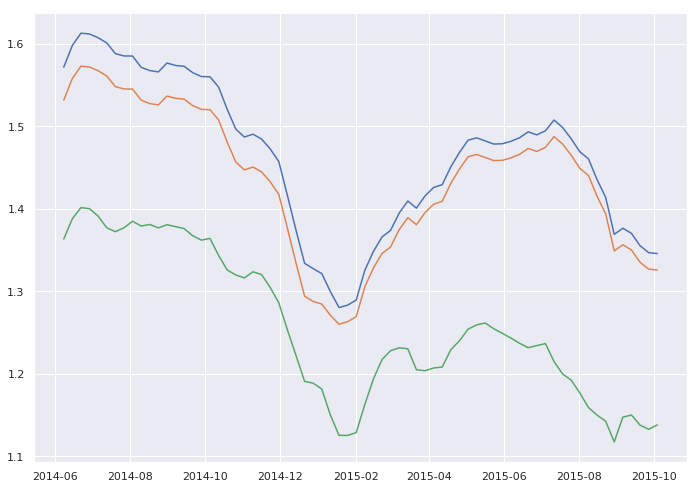

In [263]:
plt.plot(weekly_mean_grouped_by_id.groupby("DATE_CHANGED").mean())

In [107]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

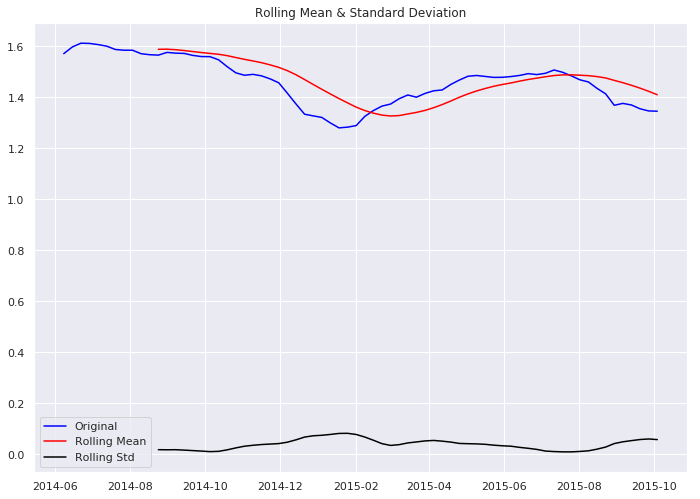

Results of Dickey-Fuller Test:
Test Statistic                 -1.869829
p-value                         0.346385
#Lags Used                      1.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


In [108]:
test_stationarity(ts_e5)

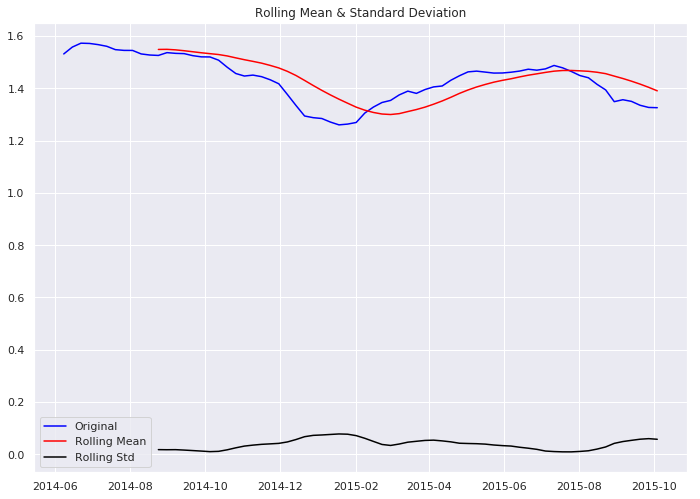

Results of Dickey-Fuller Test:
Test Statistic                 -1.923606
p-value                         0.321039
#Lags Used                      1.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


In [109]:
test_stationarity(ts_e10)

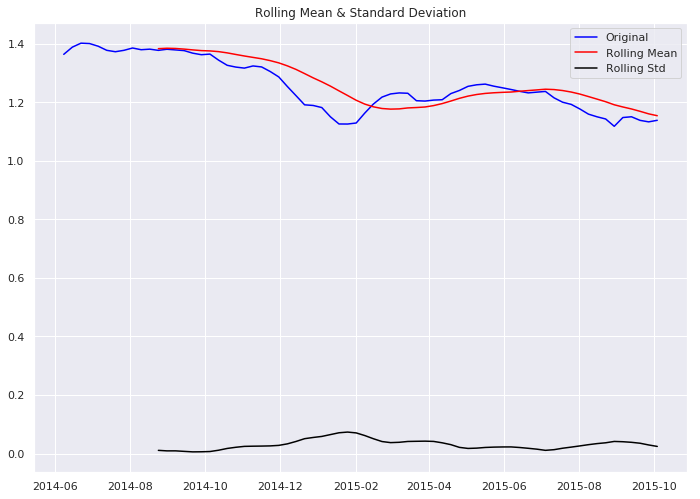

Results of Dickey-Fuller Test:
Test Statistic                 -1.596723
p-value                         0.485239
#Lags Used                      1.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


In [110]:
test_stationarity(ts_diesel)

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

1. Constant mean
2. Constant variance
3. An autocovariance that does not depend on time.

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [210]:
log_weekly_mean_grouped_by_id = weekly_mean_grouped_by_id.transform(np.log)
ts_log_diff_grouped_by_id = log_weekly_mean_grouped_by_id - log_weekly_mean_grouped_by_id.shift()
ts_log_diff_grouped_by_id.dropna(inplace=True)

In [211]:
ts_log_diff_grouped_by_id

E5      ...             DIESEL
ID                                   DATE_CHANGED                ...                   
00060385-0001-4444-8888-acdc00000001 2014-09-07    0.006414      ...       3.685961e-03
                                     2014-09-14    0.003192      ...       0.000000e+00
                                     2014-09-21   -0.004258      ...      -7.385558e-03
                                     2014-09-28   -0.000534      ...       1.665335e-16
                                     2014-10-05    0.001600      ...       3.699597e-03
                                     2014-10-12   -0.007794      ...      -1.327618e-02
                                     2014-10-19   -0.028005      ...      -2.052351e-02
                                     2014-10-26   -0.024599      ...      -5.105960e-03
                                     2014-11-02    0.002261      ...       2.556239e-03
                                     2014-11-09    0.003608      ...       4.076439e-03
                                     2014-11-16   -0.001351      ...       1.524391e-03
                                     2014-11-23   -0.006784      ...      -1.457640e-02
                                     2014-11-30   -0.008202      ...      -2.266607e-02
                                     2014-12-07   -0.039193      ...      -3.213128e-02
                                     2014-12-14   -0.032278      ...      -2.354022e-02
                                     2014-12-21   -0.020481      ...      -2.325195e-02
                                     2014-12-28    0.000000      ...       0.000000e+00
                                     2015-01-04    0.000000      ...       0.000000e+00
                                     2015-01-11   -0.030560      ...      -3.481640e-02
                                     2015-01-18   -0.007788      ...      -2.996928e-02
                                     2015-01-25    0.007788      ...       1.209570e-02
                                     2015-02-01    0.000000      ...       0.000000e+00
                                     2015-02-08    0.016669      ...       1.934872e-02
                                     2015-02-15    0.028828      ...       4.185919e-02
                                     2015-02-22    0.004438      ...       1.682125e-02
                                     2015-03-01    0.004173      ...       6.926195e-03
                                     2015-03-08    0.020609      ...       7.974743e-03
                                     2015-03-15    0.011928      ...      -1.096191e-03
                                     2015-03-22   -0.004754      ...      -2.007961e-02
                                     2015-03-29    0.007123      ...      -2.100400e-03
...                                                     ...      ...                ...
ff719585-52e4-40f3-a217-2e1b5a5c5633 2015-03-15    0.015089      ...       1.216159e-03
                                     2015-03-22   -0.007552      ...      -2.133884e-02
                                     2015-03-29    0.012744      ...       3.641211e-03
                                     2015-04-05    0.009831      ...      -7.220544e-04
                                     2015-04-12    0.002207      ...      -3.533822e-03
                                     2015-04-19    0.017479      ...       2.218931e-02
                                     2015-04-26    0.008933      ...       6.868159e-03
                                     2015-05-03    0.010979      ...       1.181793e-02
                                     2015-05-10    0.001130      ...       1.086385e-02
                                     2015-05-17    0.001734      ...       7.034498e-03
                                     2015-05-24    0.001978      ...       1.493040e-03
                                     2015-05-31    0.005118      ...      -3.492352e-04
                                     2015-06-07    0.004196      ...      -4.551191e-03
         

In [204]:
log_e5 = log_weekly_mean_grouped_by_id["E5"].groupby("DATE_CHANGED").mean()
log_e10 = log_weekly_mean_grouped_by_id["E10"].groupby("DATE_CHANGED").mean()
log_diesel = log_weekly_mean_grouped_by_id["DIESEL"].groupby("DATE_CHANGED").mean()

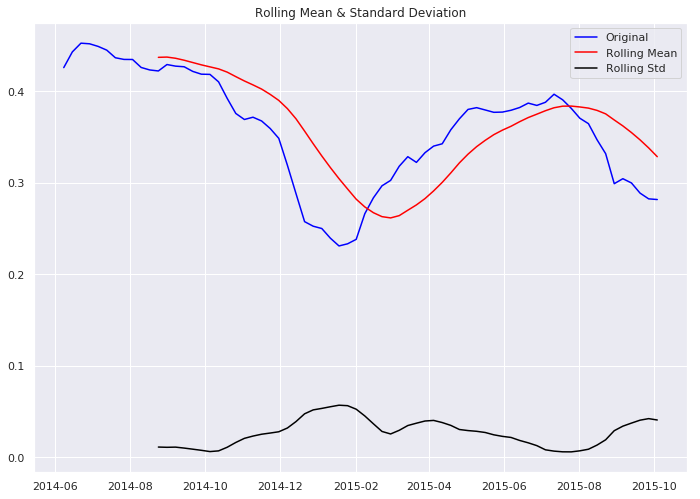

Results of Dickey-Fuller Test:
Test Statistic                 -1.908303
p-value                         0.328165
#Lags Used                      1.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


In [207]:
test_stationarity(log_e10)

In [212]:
log_diff_e5 = ts_log_diff_grouped_by_id["E5"].groupby("DATE_CHANGED").mean()
log_diff_e10 = ts_log_diff_grouped_by_id["E10"].groupby("DATE_CHANGED").mean()
log_diff_diesel = ts_log_diff_grouped_by_id["DIESEL"].groupby("DATE_CHANGED").mean()

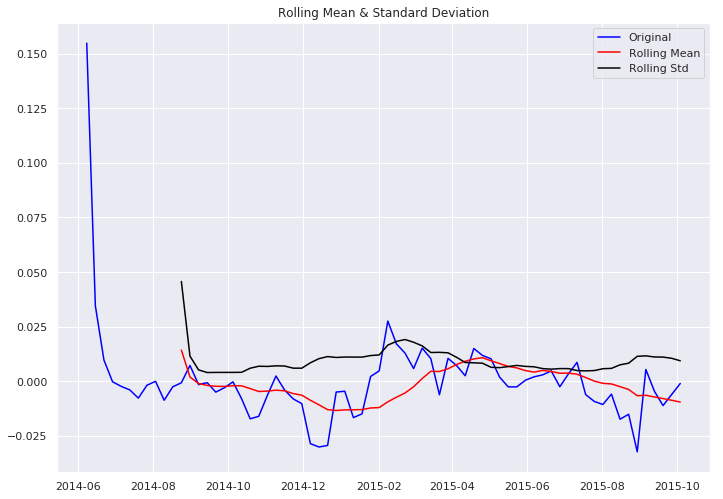

Results of Dickey-Fuller Test:
Test Statistic                -1.300766e+01
p-value                        2.607300e-24
#Lags Used                     0.000000e+00
Number of Observations Used    6.900000e+01
Critical Value (1%)           -3.528890e+00
Critical Value (5%)           -2.904440e+00
Critical Value (10%)          -2.589656e+00
dtype: float64


In [213]:
test_stationarity(log_diff_e5)

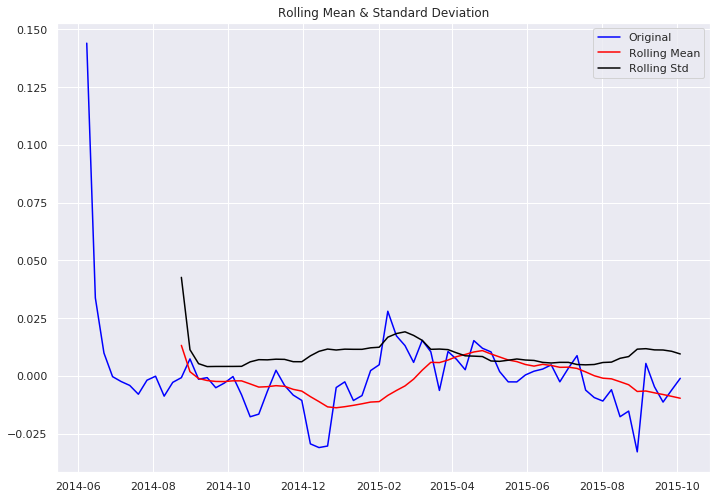

Results of Dickey-Fuller Test:
Test Statistic                -1.205372e+01
p-value                        2.562159e-22
#Lags Used                     0.000000e+00
Number of Observations Used    6.900000e+01
Critical Value (1%)           -3.528890e+00
Critical Value (5%)           -2.904440e+00
Critical Value (10%)          -2.589656e+00
dtype: float64


In [214]:
test_stationarity(log_diff_e10)

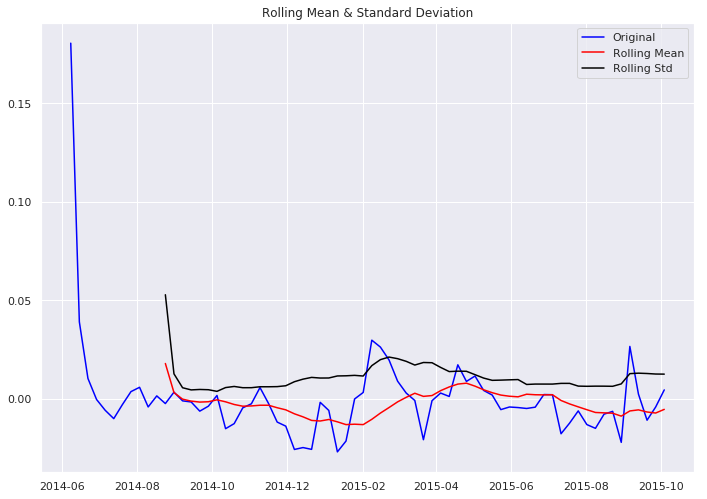

Results of Dickey-Fuller Test:
Test Statistic                -1.419625e+01
p-value                        1.820347e-26
#Lags Used                     0.000000e+00
Number of Observations Used    6.900000e+01
Critical Value (1%)           -3.528890e+00
Critical Value (5%)           -2.904440e+00
Critical Value (10%)          -2.589656e+00
dtype: float64


In [215]:
test_stationarity(log_diff_diesel)

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Running the example prints the test statistic value of between -12 and -14. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -14 is less than the value of -3.528 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

In [245]:
#ewma again
# take EWMA in both directions with a smaller span term
fwd = ts_log_diff_grouped_by_id.ewm(span=15).mean()          # take EWMA in fwd direction
bwd = ts_log_diff_grouped_by_id[::-1].ewm(span=15).mean()
bwd.sort_index(inplace = True)
ewma_prediction = (fwd + bwd) / 2
ewma_prediction

E5    ...       DIESEL
ID                                   DATE_CHANGED              ...             
00060385-0001-4444-8888-acdc00000001 2014-09-07    0.001041    ...    -0.000433
                                     2014-09-14   -0.000586    ...    -0.002004
                                     2014-09-21   -0.002929    ...    -0.004137
                                     2014-09-28   -0.003414    ...    -0.003816
                                     2014-10-05   -0.003808    ...    -0.003646
                                     2014-10-12   -0.005529    ...    -0.005946
                                     2014-10-19   -0.008466    ...    -0.007442
                                     2014-10-26   -0.008922    ...    -0.006428
                                     2014-11-02   -0.006628    ...    -0.005740
                                     2014-11-09   -0.006210    ...    -0.005660
                                     2014-11-16   -0.006568    ...    -0.006143
                                     2014-11-23   -0.007171    ...    -0.007903
                                     2014-11-30   -0.007537    ...    -0.009069
                                     2014-12-07   -0.010078    ...    -0.010084
                                     2014-12-14   -0.009505    ...    -0.009375
                                     2014-12-21   -0.008036    ...    -0.008878
                                     2014-12-28   -0.005632    ...    -0.006487
                                     2015-01-04   -0.004651    ...    -0.005705
                                     2015-01-11   -0.005859    ...    -0.007418
                                     2015-01-18   -0.003145    ...    -0.006089
                                     2015-01-25   -0.000745    ...    -0.001809
                                     2015-02-01   -0.000019    ...    -0.001248
                                     2015-02-08    0.002273    ...     0.001297
                                     2015-02-15    0.004028    ...     0.003742
                                     2015-02-22    0.002965    ...     0.002428
                                     2015-03-01    0.003379    ...     0.001768
                                     2015-03-08    0.004847    ...     0.001698
                                     2015-03-15    0.004437    ...     0.000866
                                     2015-03-22    0.003366    ...    -0.000573
                                     2015-03-29    0.004242    ...     0.000678
...                                                     ...    ...          ...
ff719585-52e4-40f3-a217-2e1b5a5c5633 2015-03-15    0.004894    ...     0.001178
                                     2015-03-22    0.003466    ...    -0.000365
                                     2015-03-29    0.004951    ...     0.001477
                                     2015-04-05    0.004815    ...     0.001413
                                     2015-04-12    0.004295    ...     0.001493
                                     2015-04-19    0.005259    ...     0.003458
                                     2015-04-26    0.004472    ...     0.002453
                                     2015-05-03    0.004280    ...     0.002667
                                     2015-05-10    0.003207    ...     0.002321
                                     2015-05-17    0.002852    ...     0.001628
                                     2015-05-24    0.002490    ...     0.000729
                                     2015-05-31    0.002312    ...     0.000061
                                     2015-06-07    0.001801    ...    -0.000748
                                     2015-06-14    0.001430    ...    -0.001246
                                     2015-06-21    0.000573    ...    -0.001386
                                     2015-06-28   -0.000254    ...    -0.001000
                                     2015-07-05    0.000235    ...    -0.001191
                                     2015-07-12   -0.0024

In [246]:
ewma_prediction_cum_sum = ewma_prediction.cumsum()
ewma_prediction_log = log_weekly_mean_grouped_by_id + ewma_prediction_cum_sum

In [247]:
ewma_prediction_log.bfill(inplace = True)

In [248]:
ewma_prediction_log.head()

E5    ...       DIESEL
ID                                   DATE_CHANGED              ...             
00060385-0001-4444-8888-acdc00000001 2014-08-31    0.448288    ...     0.306316
                                     2014-09-07    0.448288    ...     0.306316
                                     2014-09-14    0.450893    ...     0.304312
                                     2014-09-21    0.443707    ...     0.292789
                                     2014-09-28    0.439760    ...     0.288973

[5 rows x 3 columns]

In [249]:
prediction_ewma = ewma_prediction_log.transform(np.exp)
prediction_ewma

E5    ...       DIESEL
ID                                   DATE_CHANGED              ...             
00060385-0001-4444-8888-acdc00000001 2014-08-31    1.565629    ...     1.358412
                                     2014-09-07    1.565629    ...     1.358412
                                     2014-09-14    1.569714    ...     1.355692
                                     2014-09-21    1.558473    ...     1.340160
                                     2014-09-28    1.552334    ...     1.335056
                                     2014-10-05    1.548910    ...     1.335127
                                     2014-10-12    1.528411    ...     1.309708
                                     2014-10-19    1.473672    ...     1.273589
                                     2014-10-26    1.425093    ...     1.258984
                                     2014-11-02    1.418883    ...     1.254982
                                     2014-11-09    1.415196    ...     1.252997
                                     2014-11-16    1.404033    ...     1.247223
                                     2014-11-23    1.384576    ...     1.219499
                                     2014-11-30    1.362954    ...     1.181405
                                     2014-12-07    1.297427    ...     1.132570
                                     2014-12-14    1.244333    ...     1.095899
                                     2014-12-21    1.209349    ...     1.061247
                                     2014-12-28    1.202558    ...     1.054385
                                     2015-01-04    1.196978    ...     1.048387
                                     2015-01-11    1.154170    ...     1.005031
                                     2015-01-18    1.141620    ...     0.969436
                                     2015-01-25    1.149689    ...     0.979460
                                     2015-02-01    1.149667    ...     0.978238
                                     2015-02-08    1.171652    ...     0.998645
                                     2015-02-15    1.210788    ...     1.045239
                                     2015-02-22    1.219785    ...     1.065554
                                     2015-03-01    1.229031    ...     1.074859
                                     2015-03-08    1.260719    ...     1.085306
                                     2015-03-15    1.281520    ...     1.085056
                                     2015-03-22    1.279742    ...     1.062876
...                                                     ...    ...          ...
ff719585-52e4-40f3-a217-2e1b5a5c5633 2015-03-15    1.434438    ...     1.271188
                                     2015-03-22    1.428588    ...     1.243896
                                     2015-03-29    1.454093    ...     1.250279
                                     2015-04-05    1.475545    ...     1.251143
                                     2015-04-12    1.485170    ...     1.248592
                                     2015-04-19    1.519328    ...     1.281029
                                     2015-04-26    1.539832    ...     1.293026
                                     2015-05-03    1.563509    ...     1.311892
                                     2015-05-10    1.570304    ...     1.329303
                                     2015-05-17    1.577522    ...     1.340868
                                     2015-05-24    1.584585    ...     1.343852
                                     2015-05-31    1.596402    ...     1.343464
                                     2015-06-07    1.606004    ...     1.336364
                                     2015-06-14    1.618571    ...     1.327721
                                     2015-06-21    1.624143    ...     1.323965
                                     2015-06-28    1.624532    ...     1.337748
                                     2015-07-05    1.656916    ...     1.365011
                                     2015-07-12    1.6504

# Task 4 - Analyze the result

In [250]:
ew_e5 = prediction_ewma["E5"].groupby("DATE_CHANGED").mean()
ew_e10 = prediction_ewma["E10"].groupby("DATE_CHANGED").mean()
ew_diesel = prediction_ewma["DIESEL"].groupby("DATE_CHANGED").mean()

In [251]:
print(">>mean square error<<\n",np.square(weekly_mean_grouped_by_id - prediction_ewma).mean())
print(">>absolute differences error<<\n",np.absolute(weekly_mean_grouped_by_id - prediction_ewma).mean())

>>mean square error<<
 E5        0.007373
E10       0.005863
DIESEL    0.008681
dtype: float64
>>absolute differences error<<
 E5        0.075166
E10       0.066086
DIESEL    0.083721
dtype: float64


([<matplotlib.lines.Line2D at 0x7f2b144b44a8>],
 [<matplotlib.lines.Line2D at 0x7f2b144682b0>])

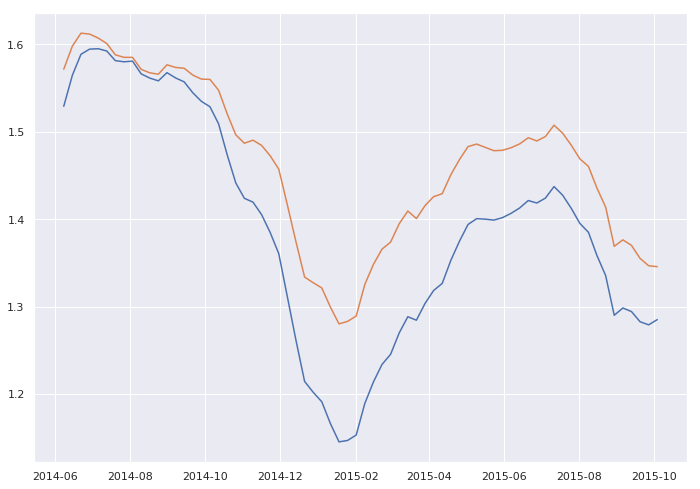

In [252]:
plt.plot(ew_e5), plt.plot(ts_e5)

([<matplotlib.lines.Line2D at 0x7f2b144687f0>],
 [<matplotlib.lines.Line2D at 0x7f2b14431fd0>])

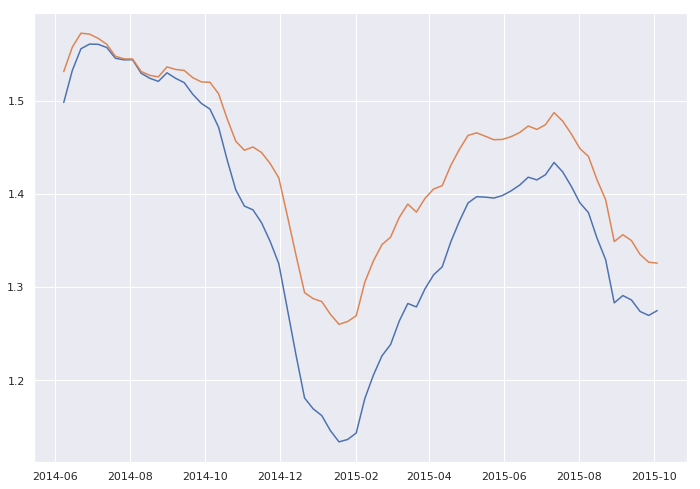

In [253]:
plt.plot(ew_e10), plt.plot(ts_e10)

([<matplotlib.lines.Line2D at 0x7f2b143e3b38>],
 [<matplotlib.lines.Line2D at 0x7f2b143899e8>])

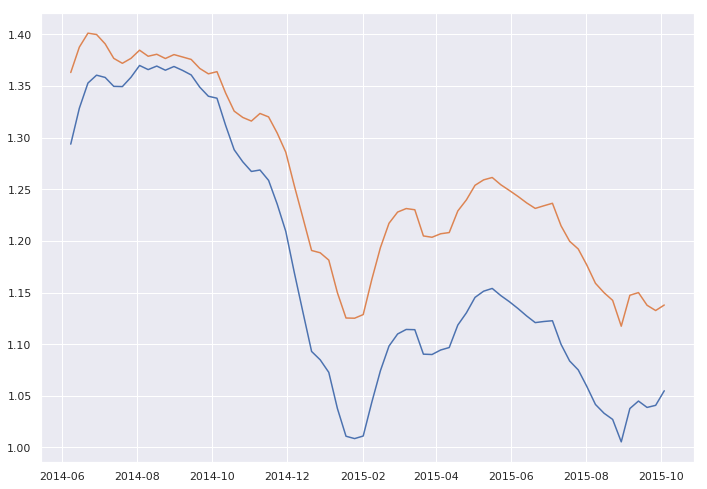

In [254]:
plt.plot(ew_diesel), plt.plot(ts_diesel)

In [267]:
print("Selecting cheapest brands gives this amount of savings for our truck fleet with respect to gasoline types in a year")
(one_year_monthly_mean[["E5_COST", "E10_COST", "DIESEL_COST"]].sum() - one_year_monthly_mean_cheapest_brand[["E5_COST", "E10_COST", "DIESEL_COST"]].sum())*100

Selecting cheapest brands gives this amount of savings for our truck fleet with respect to gasoline types in a year


E5_COST        186957.957863
E10_COST       189414.089413
DIESEL_COST    294780.114967
dtype: float64

In [268]:
print("Selecting cheapest places gives this amount of savings for our truck fleet with respect to gasoline types in a year")
(one_year_monthly_mean[["E5_COST", "E10_COST", "DIESEL_COST"]].sum() - one_year_monthly_mean_cheapest_place[["E5_COST", "E10_COST", "DIESEL_COST"]].sum())*100

Selecting cheapest places gives this amount of savings for our truck fleet with respect to gasoline types in a year


E5_COST        129692.248990
E10_COST       130152.518857
DIESEL_COST    220628.996052
dtype: float64

We have less than 10 % error. We suggest the drivers to select brands with respect to our prediction about cheapest brands. But we can assume the truck drivers don't follow the rules all the time. The potential savings might differ greatly. Maybe we can track our trucks to get a data about what are they doing. In this way we can use better data and make more correct prediction. 